In [9]:
from src.utils import load_data
from src.model1 import Model1

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
vitals_path='data/vitals_ts_small.csv'
cohort_path='data/icu_cohort_small.csv'
freq='6H'
test_size=0.2
random_state=42
n_stay_ids=10000
verbose=True

In [11]:
if verbose:
    print("=" * 60)
    print("BASELINE MODEL 1: Fixed Grid with Imputation")
    print("=" * 60)
    print(f"\nModel Type: XGBoost")
    print(f"Resampling Frequency: {freq}")
    print(f"Test Size: {test_size}")

if verbose:
    print("\n[1/5] Loading data...")
df_vitals, df_patients = load_data(vitals_path, cohort_path)
if verbose:
    print(f"  - Loaded {len(df_patients)} patients")
    print(f"  - Loaded {len(df_vitals)} vital sign measurements")

BASELINE MODEL 1: Fixed Grid with Imputation

Model Type: XGBoost
Resampling Frequency: 6H
Test Size: 0.2

[1/5] Loading data...
  - Loaded 94444 patients
  - Loaded 11572805 vital sign measurements


In [20]:
if verbose:
    print("\n[2/5] Regularizing time series onto fixed grid...")
model = Model1(freq=freq, random_state=random_state, n_stay_ids=n_stay_ids)

df_features = model.regularize_time_series(df_vitals, df_patients)
if verbose:
    print(f"  - Created {len(df_features.columns) - 2} features")
    print(f"  - Mortality rate: {df_features['died_in_hosp'].mean():.2%}")


[2/5] Regularizing time series onto fixed grid...
  - Created 22 features
  - Mortality rate: 11.88%


In [21]:
if verbose:
    print("\n[3/5] Preparing data for training...")
X_train, X_test, y_train, y_test = model.prepare_data(df_features, test_size=test_size)
if verbose:
    print(f"  - Training set: {len(X_train)} samples")
    print(f"  - Test set: {len(X_test)} samples")


[3/5] Preparing data for training...
  - Training set: 8000 samples
  - Test set: 2000 samples


In [22]:
if verbose:
    print(f"\n[4/5] Training XGBoost...")
model.fit(X_train, y_train)
if verbose:
    print("  - Training complete!")


[4/5] Training XGBoost...
  - Training complete!


In [ ]:
if verbose:
    print("\n[5/5] Evaluating model...")
results = model.evaluate(X_train, X_test, y_train, y_test, verbose=verbose)

model.get_feature_importance()


[5/5] Evaluating model...

=== XGBoost Results ===
Train Accuracy: 0.9225
Test Accuracy: 0.8750
Train AUC-ROC: 0.9194
Test AUC-ROC: 0.6371

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1762
           1       0.32      0.05      0.08       238

    accuracy                           0.88      2000
   macro avg       0.60      0.52      0.51      2000
weighted avg       0.82      0.88      0.83      2000


BASELINE MODEL COMPLETE


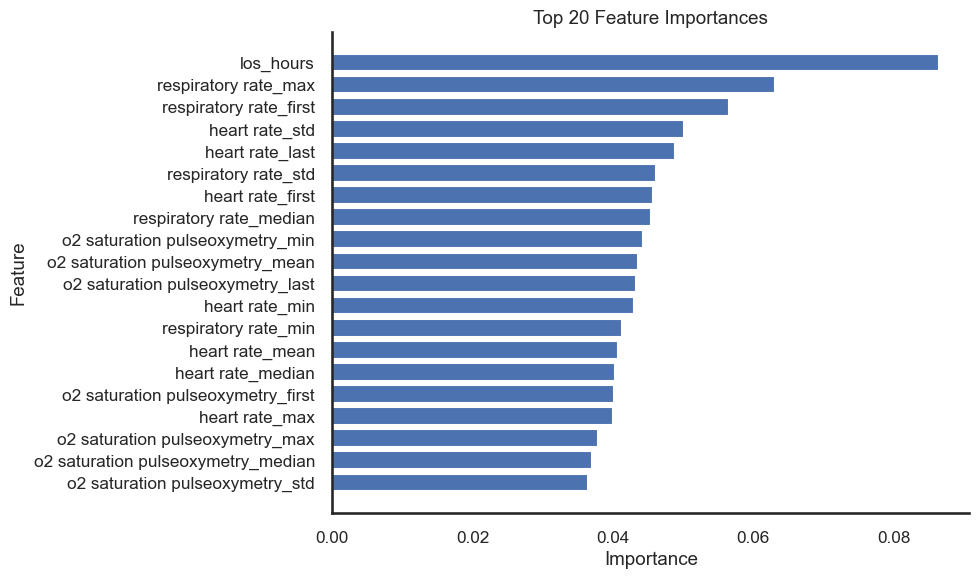

In [35]:
model.plot_feature_importance()